# All Sites Plots 2

* trying to make some 3d snow depth plots for the WADNR report figures 

created by Cassie Lumbrazo\
date: July 2023\
python environment: **raster**


In [2]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr

import copy 
import pickle

In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
ds_ce = xr.open_dataset('/home/lumbraca/raster/data/cer_model_cleandata_create_netcdf.nc')
ds_sr = xr.open_dataset('/home/lumbraca/raster/data/sr_model_cleandata_create_netcdf.nc')
ds_fl = xr.open_dataset('/home/lumbraca/raster/data/fl_model_cleandata_create_netcdf.nc')

In [10]:
ds_ce.chmas.mean()

<xarray.DataArray 'chmas' ()>
array(7.056349, dtype=float32)
Coordinates:
    spatial_ref  int32 ...

In [6]:
# dem = gdal.Open("/home/lumbraca/raster/data/NCALM/SOUT_GEG_03F.tif")

In [12]:
X=ds_ce.x.to_numpy()
Y=ds_ce.y.to_numpy()
Z=ds_ce.dem.to_numpy()

In [14]:
len(X)

6248

In [16]:
len(Y)

5168

In [17]:
len(Z)

1

In [31]:
snow = ds_ce.snowdepth.drop_vars('band')
snow

<xarray.DataArray 'snowdepth' (band: 1, y: 5168, x: 6248)>
[32289664 values with dtype=float32]
Coordinates:
  * x            (x) float64 1.519e+06 1.519e+06 ... 1.538e+06 1.538e+06
  * y            (y) float64 6.992e+05 6.992e+05 ... 6.837e+05 6.837e+05
    spatial_ref  int32 ...
Dimensions without coordinates: band
Attributes:
    AREA_OR_POINT:       Area
    DataType:            Generic
    BandName:            Band_1
    RepresentationType:  ATHEMATIC
    long_name:           Band_1

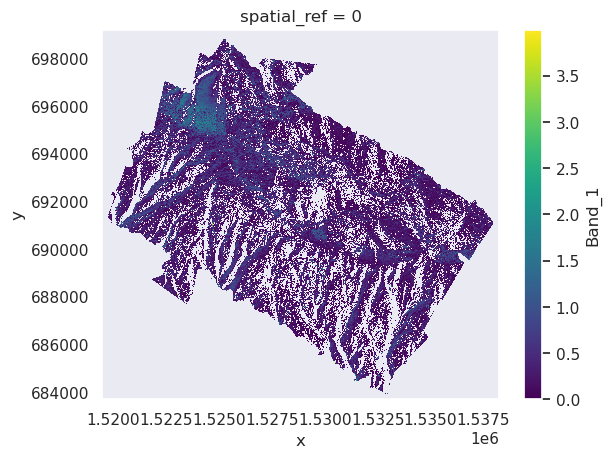

In [32]:
snow.plot()

In [34]:
snow.plot.surface()

ValueError: DataArray must be 2d

In [33]:
ds_ce.snowdepth.plot.contourf()

ValueError: DataArray must be 2d

In [23]:
ds_ce.snowdepth.T.plot.surface()

ValueError: DataArray must be 2d

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 5168, 6248)

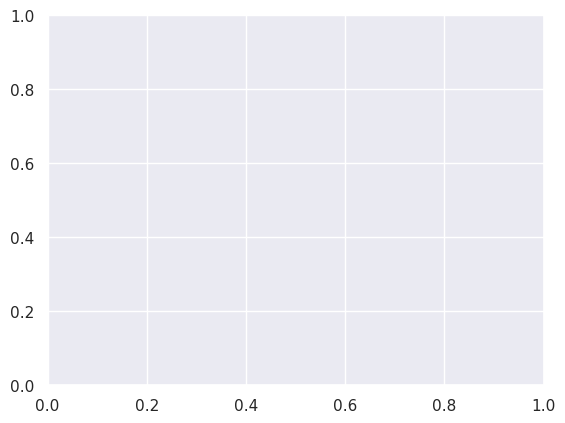

In [20]:
plt.plot(Z)

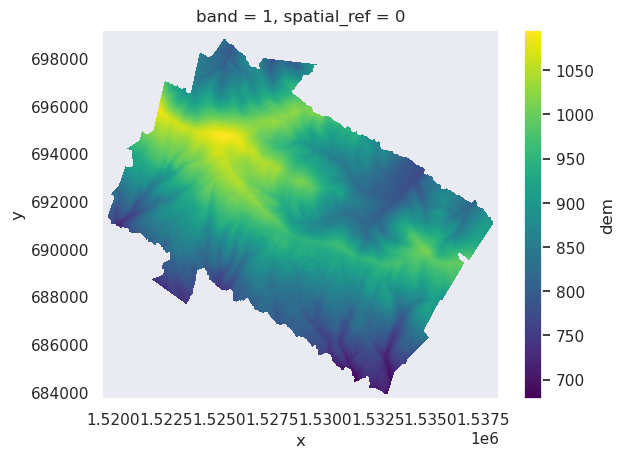

In [77]:
ds_ce.dem.plot()

In [61]:
len(x)

30

In [11]:
type(z)

numpy.ndarray

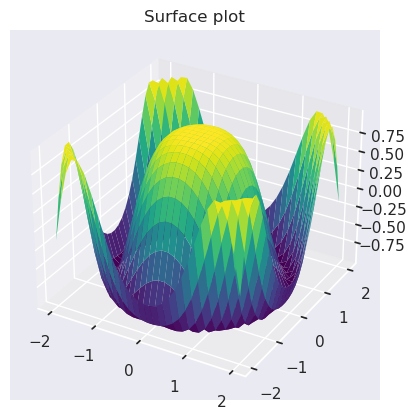

In [9]:
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
z = np.cos(x ** 2 + y ** 2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [63]:
X, Y = np.meshgrid(X, Y)

MemoryError: Unable to allocate 7.41 PiB for an array with shape (32289664, 32289664) and data type float64

In [8]:
X.shape

(5168, 6248)

In [11]:
dem_values = ds_ce.dem.values

In [12]:
dem_values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [18]:
ds_ce.x

<xarray.DataArray 'x' (x: 6248)>
array([1519492.67, 1519495.67, 1519498.67, ..., 1538227.67, 1538230.67,
       1538233.67])
Coordinates:
  * x            (x) float64 1.519e+06 1.519e+06 ... 1.538e+06 1.538e+06
    spatial_ref  int32 ...

In [19]:
xr.DataArray(dem_values, dims={'x':ds_ce.x, 'y':ds_ce.y})

ValueError: different number of dimensions on data and dims: 3 vs 2

In [20]:
X.shape

(5168, 6248)

In [21]:
Y.shape

(5168, 6248)

In [22]:
Z.shape

(1, 5168, 6248)

In [29]:
Z2 = Z.drop('band')

In [32]:
Z2

<xarray.DataArray 'dem' (band: 1, y: 5168, x: 6248)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 1.519e+06 1.519e+06 ... 1.538e+06 1.538e+06
  * y            (y) float64 6.992e+05 6.992e+05 ... 6.837e+05 6.837e+05
    spatial_ref  int32 ...
Dimensions without coordinates: band

In [42]:
type(X)

numpy.ndarray

In [40]:
Y.shape

(5168, 6248)

In [48]:
x=ds_ce.x.values
y=ds_ce.y.values
z=ds_ce.dem.values

In [51]:
len(x)

6248

In [52]:
len(y)

5168

In [55]:
# np.resize(y, x.shape[0]*(x/x))
y2 = np.resize(y, 6248)

In [56]:
len(y2)

6248

MemoryError: Unable to allocate 2.20 TiB for an array with shape (6246, 3, 5168, 6248) and data type float32

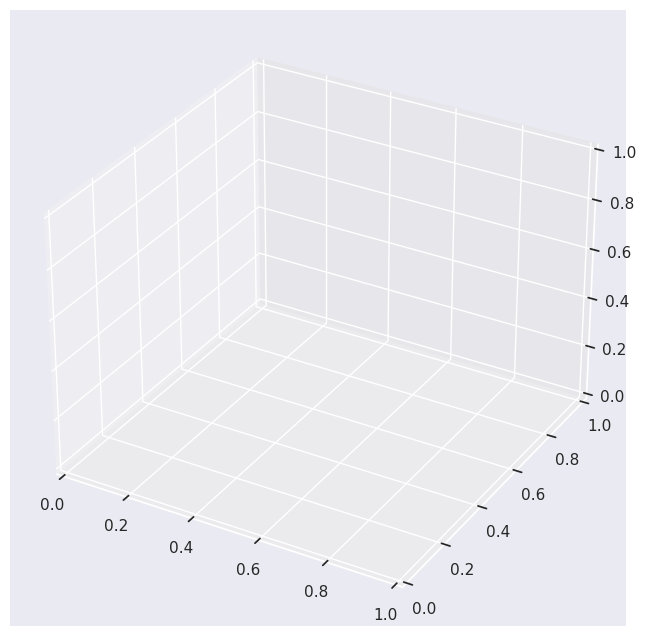

In [58]:
fig, ax = plt.subplots(figsize=(16,8), subplot_kw={'projection': '3d'})
# ax.plot_trisurf(X, Y, Z)
# ax.plot_trisurf(ds_ce.x.values, ds_ce.y.values, Z)
ax.plot_trisurf(x, y2, z)


ValueError: Argument Z must be 2-dimensional.

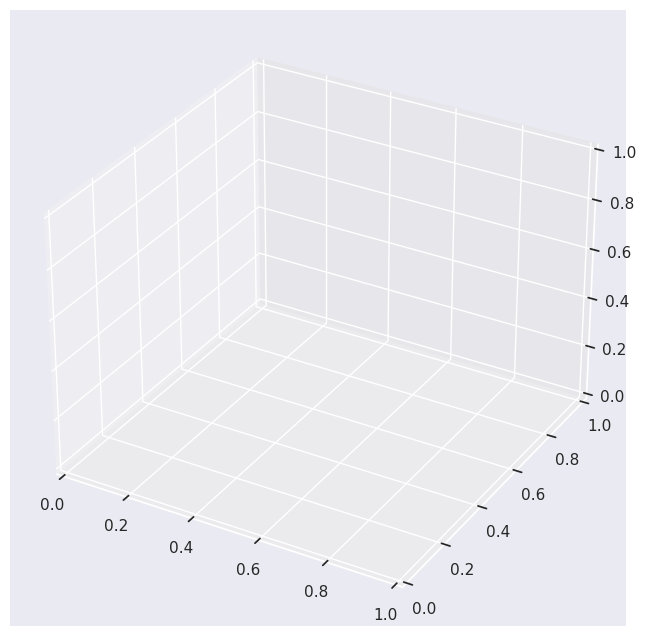

In [40]:
fig, ax = plt.subplots(figsize=(16,8), subplot_kw={'projection': '3d'})
ax.plot_surface(X=ds_ce.x.values, Y=ds_ce.y.values, Z=Z, antialiased=True)

# gt  = ds_ce.dem.GetGeoTransform()
# dem = ds_ce.dem.ReadAsArray()

xres = gt[1]
yres = gt[5]

X = np.arange(gt[0], gt[0] + dem.shape[1]*xres, xres)
Y = np.arange(gt[3], gt[3] + dem.shape[0]*yres, yres)

X, Y = np.meshgrid(X, Y)

ax.plot_surface(X, Y, Z.values, antialiased=True)

In [7]:
x

NameError: name 'x' is not defined

In [57]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = go.Figure(data=[go.Surface(z=ds_ce.dem.values)])

# fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()